# Logistic Regression Classification

## Introduction

Logistic regression is a fundamental statistical method for binary classification problems. Despite its name, it is a classification algorithm rather than a regression algorithm. It models the probability that an instance belongs to a particular class.

## Mathematical Foundation

### The Logistic Function (Sigmoid)

The core of logistic regression is the **sigmoid function** (also called the logistic function):

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

This function maps any real-valued number to the range $(0, 1)$, making it suitable for modeling probabilities.

### Hypothesis Function

For a feature vector $\mathbf{x} \in \mathbb{R}^n$ and weight vector $\mathbf{w} \in \mathbb{R}^n$ with bias $b$, the hypothesis is:

$$h_{\mathbf{w},b}(\mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x} + b)}}$$

This represents $P(y=1 | \mathbf{x}; \mathbf{w}, b)$, the probability that the output is class 1 given input $\mathbf{x}$.

### Decision Boundary

The decision boundary is defined where $h_{\mathbf{w},b}(\mathbf{x}) = 0.5$, which occurs when:

$$\mathbf{w}^T \mathbf{x} + b = 0$$

### Loss Function: Binary Cross-Entropy

For a single training example $(\mathbf{x}^{(i)}, y^{(i)})$, the loss function is:

$$\mathcal{L}(h_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log(h_{\mathbf{w},b}(\mathbf{x}^{(i)})) - (1 - y^{(i)}) \log(1 - h_{\mathbf{w},b}(\mathbf{x}^{(i)}))$$

### Cost Function

The total cost over $m$ training examples is:

$$J(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\mathbf{w},b}(\mathbf{x}^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\mathbf{w},b}(\mathbf{x}^{(i)})) \right]$$

### Gradient Descent Update

The gradients are computed as:

$$\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}$$

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})$$

The parameters are updated as:

$$w_j := w_j - \alpha \frac{\partial J}{\partial w_j}$$

$$b := b - \alpha \frac{\partial J}{\partial b}$$

where $\alpha$ is the learning rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)

## Implementation

### Sigmoid Function

In [2]:
def sigmoid(z):
    """Compute the sigmoid function."""
    # Clip values to avoid overflow in exp
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

### Logistic Regression Class

In [3]:
class LogisticRegression:
    """Logistic Regression classifier using gradient descent."""
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        
    def fit(self, X, y):
        """Train the logistic regression model."""
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.cost_history = []
        
        # Gradient descent
        for _ in range(self.n_iterations):
            # Forward pass
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)
            
            # Compute cost
            epsilon = 1e-15  # Small value to avoid log(0)
            cost = -np.mean(y * np.log(y_predicted + epsilon) + 
                           (1 - y) * np.log(1 - y_predicted + epsilon))
            self.cost_history.append(cost)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
        return self
    
    def predict_proba(self, X):
        """Predict class probabilities."""
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """Predict class labels."""
        return (self.predict_proba(X) >= threshold).astype(int)

## Generate Synthetic Dataset

We create a linearly separable dataset with two classes for demonstration.

In [4]:
def generate_classification_data(n_samples=200, noise=0.5):
    """Generate synthetic binary classification data."""
    n_per_class = n_samples // 2
    
    # Class 0: centered at (-1, -1)
    X0 = np.random.randn(n_per_class, 2) * noise + np.array([-1, -1])
    
    # Class 1: centered at (1, 1)
    X1 = np.random.randn(n_per_class, 2) * noise + np.array([1, 1])
    
    X = np.vstack([X0, X1])
    y = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)])
    
    # Shuffle the data
    shuffle_idx = np.random.permutation(n_samples)
    X = X[shuffle_idx]
    y = y[shuffle_idx]
    
    return X, y

# Generate data
X, y = generate_classification_data(n_samples=300, noise=0.8)

# Split into train and test sets (80-20 split)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 240
Test samples: 60


## Train the Model

In [5]:
# Create and train the model
model = LogisticRegression(learning_rate=0.1, n_iterations=1000)
model.fit(X_train, y_train)

print(f"Learned weights: {model.weights}")
print(f"Learned bias: {model.bias:.4f}")

Learned weights: [2.7024976  2.47574799]
Learned bias: 0.1680


## Evaluate the Model

In [6]:
def accuracy(y_true, y_pred):
    """Calculate classification accuracy."""
    return np.mean(y_true == y_pred)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy(y_train, y_train_pred)
test_acc = accuracy(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9667
Test Accuracy: 0.9667


## Visualization

We visualize the sigmoid function, decision boundary, training convergence, and classification results.

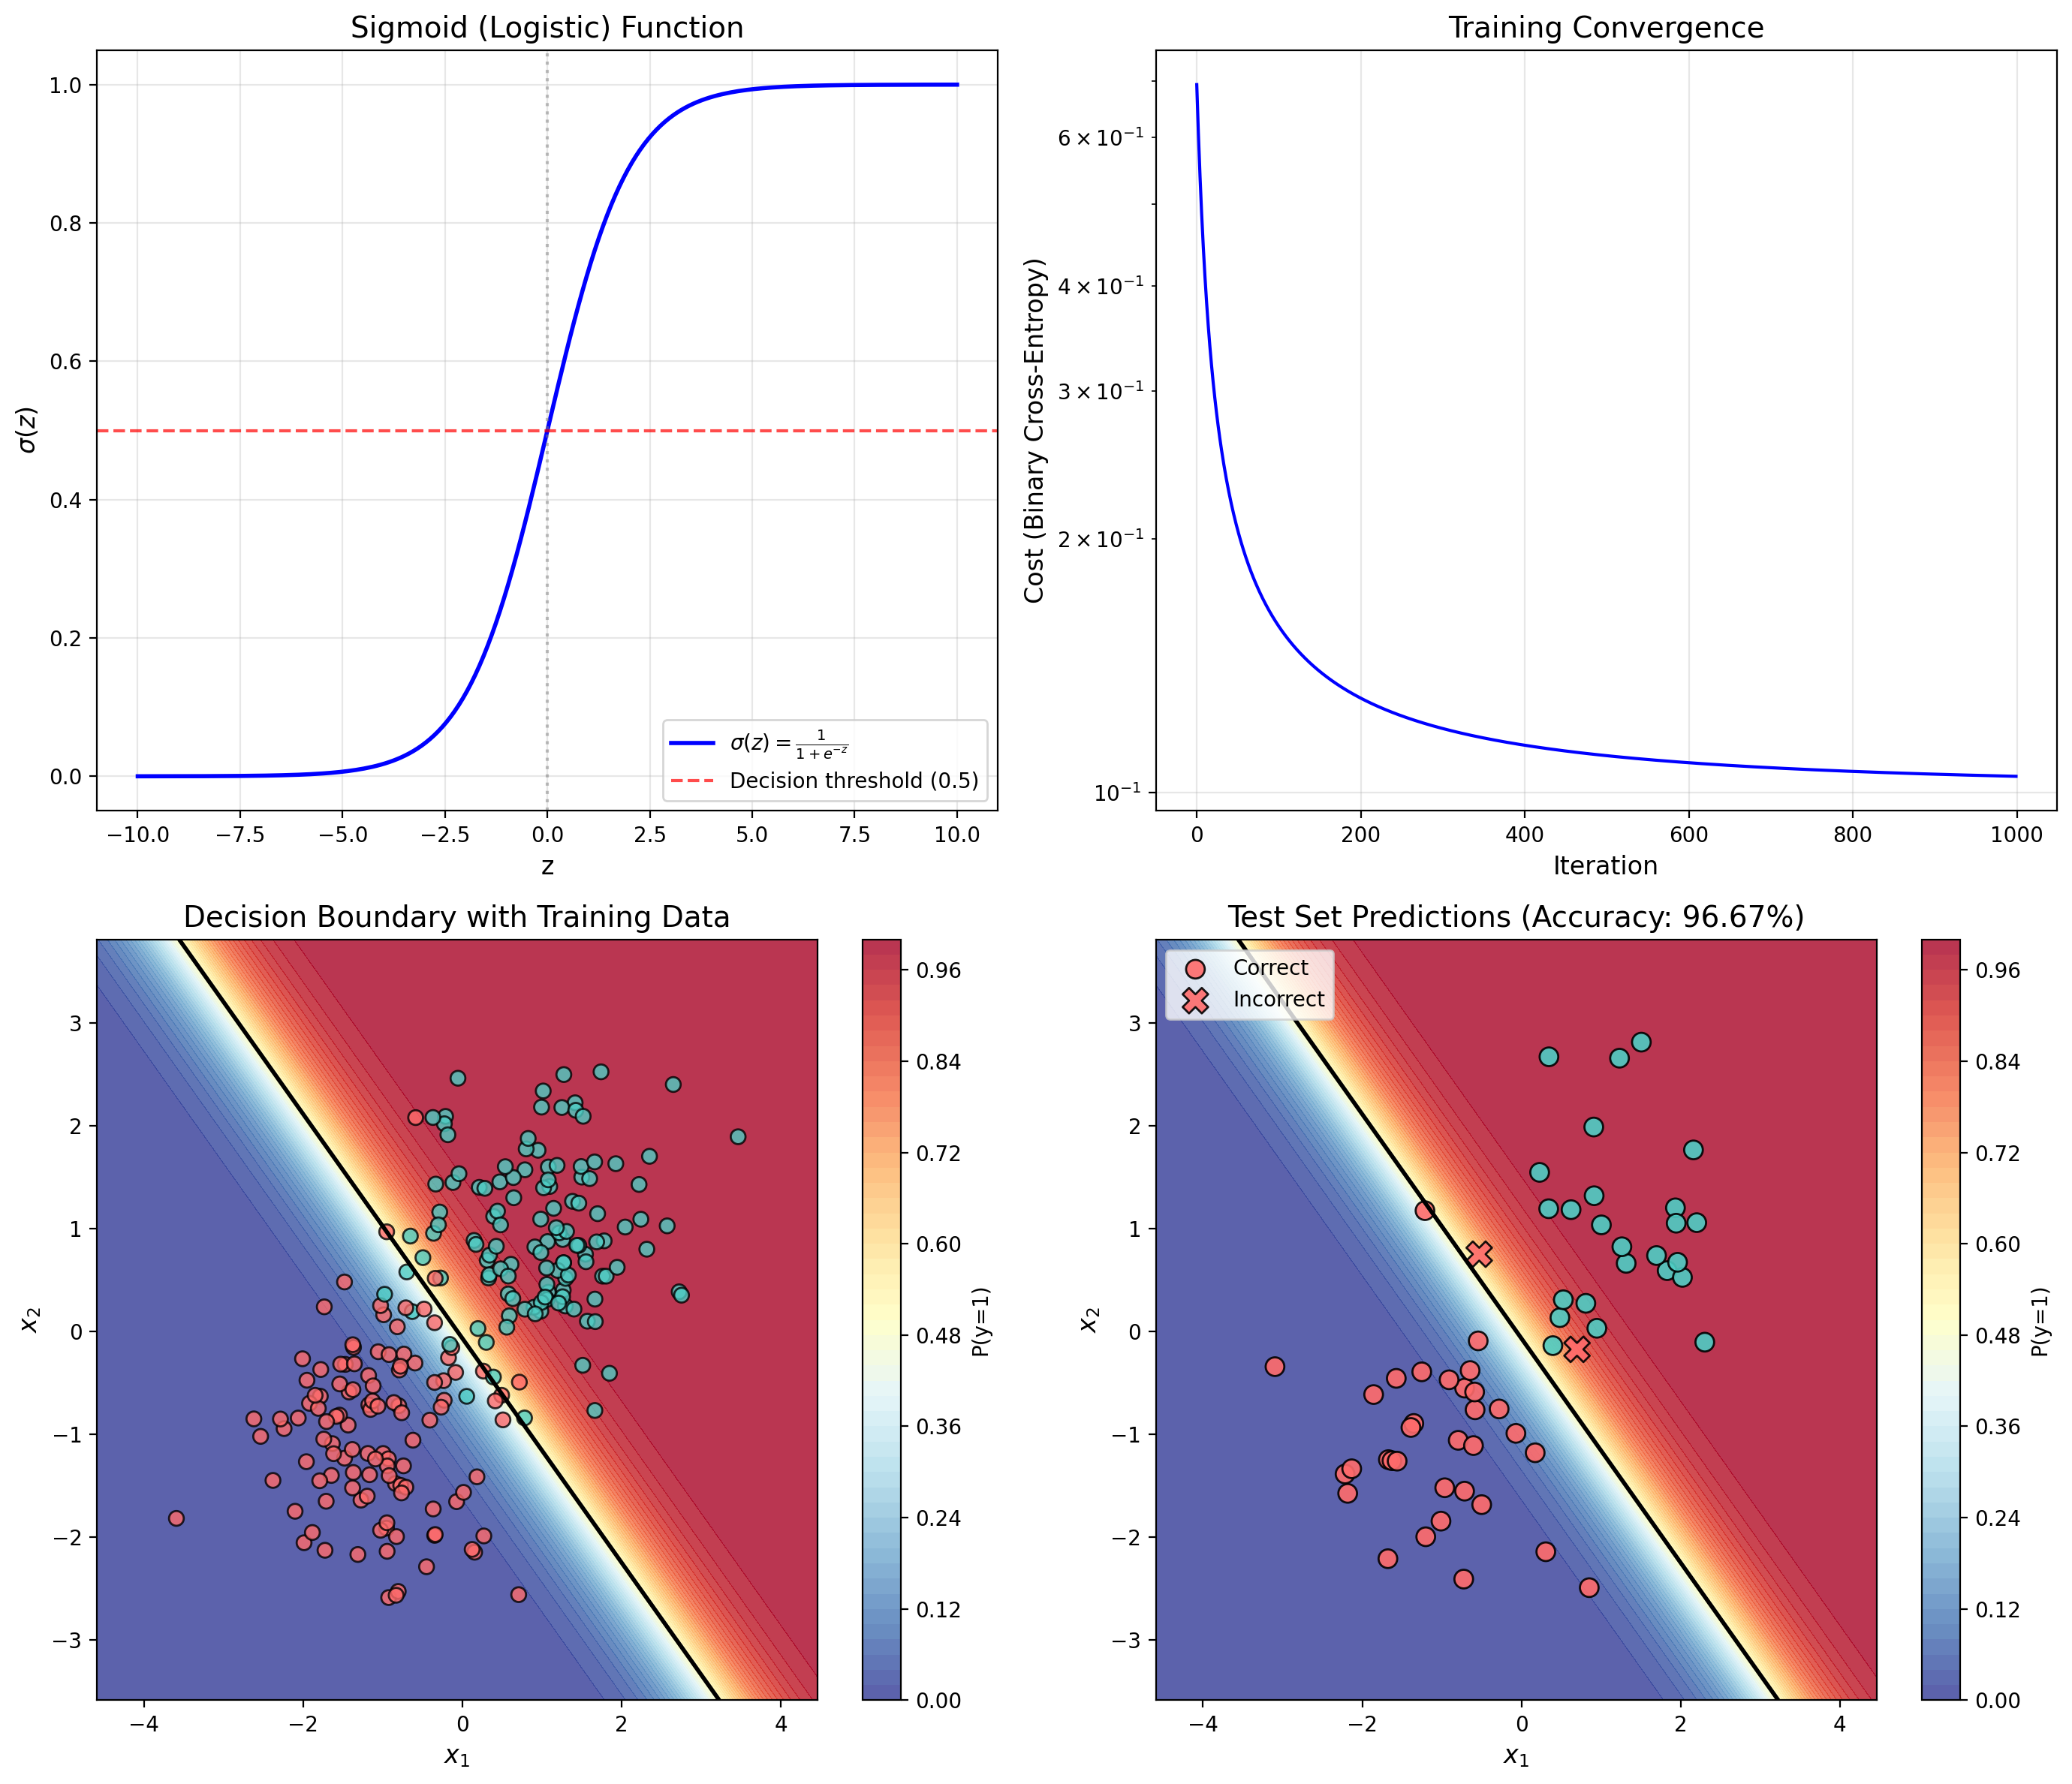


Plot saved to 'plot.png'


In [7]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Sigmoid Function
ax1 = axes[0, 0]
z = np.linspace(-10, 10, 200)
ax1.plot(z, sigmoid(z), 'b-', linewidth=2, label=r'$\sigma(z) = \frac{1}{1+e^{-z}}$')
ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision threshold (0.5)')
ax1.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
ax1.set_xlabel('z', fontsize=12)
ax1.set_ylabel(r'$\sigma(z)$', fontsize=12)
ax1.set_title('Sigmoid (Logistic) Function', fontsize=14)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.05, 1.05)

# Plot 2: Training Convergence
ax2 = axes[0, 1]
ax2.plot(model.cost_history, 'b-', linewidth=1.5)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Cost (Binary Cross-Entropy)', fontsize=12)
ax2.set_title('Training Convergence', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

# Plot 3: Decision Boundary
ax3 = axes[1, 0]

# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict probabilities for mesh points
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot probability contours
contour = ax3.contourf(xx, yy, Z, levels=50, cmap='RdYlBu_r', alpha=0.8)
plt.colorbar(contour, ax=ax3, label='P(y=1)')

# Plot decision boundary (where P=0.5)
ax3.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# Plot training data
scatter = ax3.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                      cmap=ListedColormap(['#FF6B6B', '#4ECDC4']),
                      edgecolors='black', s=50, alpha=0.8)
ax3.set_xlabel('$x_1$', fontsize=12)
ax3.set_ylabel('$x_2$', fontsize=12)
ax3.set_title('Decision Boundary with Training Data', fontsize=14)

# Plot 4: Test Results with Predictions
ax4 = axes[1, 1]

# Plot probability contours
contour2 = ax4.contourf(xx, yy, Z, levels=50, cmap='RdYlBu_r', alpha=0.8)
plt.colorbar(contour2, ax=ax4, label='P(y=1)')
ax4.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# Plot test data with prediction indicators
correct_mask = y_test == y_test_pred
incorrect_mask = ~correct_mask

# Correct predictions
ax4.scatter(X_test[correct_mask, 0], X_test[correct_mask, 1], 
            c=y_test[correct_mask],
            cmap=ListedColormap(['#FF6B6B', '#4ECDC4']),
            edgecolors='black', s=80, alpha=0.9, marker='o',
            label='Correct')

# Incorrect predictions (if any)
if np.any(incorrect_mask):
    ax4.scatter(X_test[incorrect_mask, 0], X_test[incorrect_mask, 1],
                c=y_test[incorrect_mask],
                cmap=ListedColormap(['#FF6B6B', '#4ECDC4']),
                edgecolors='black', s=150, alpha=0.9, marker='X',
                label='Incorrect')

ax4.set_xlabel('$x_1$', fontsize=12)
ax4.set_ylabel('$x_2$', fontsize=12)
ax4.set_title(f'Test Set Predictions (Accuracy: {test_acc:.2%})', fontsize=14)
ax4.legend(loc='upper left')

plt.tight_layout()
plt.savefig('logistic_regression_classification_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Summary

In this notebook, we implemented **logistic regression from scratch** for binary classification:

1. **Mathematical Foundation**: We derived the sigmoid function, hypothesis, binary cross-entropy loss, and gradient descent updates.

2. **Implementation**: Built a complete `LogisticRegression` class with methods for training, probability prediction, and classification.

3. **Results**: The model successfully learned to separate the two classes, as visualized by the decision boundary.

### Key Insights

- Logistic regression finds a **linear decision boundary** in feature space
- The sigmoid function converts linear outputs to probabilities
- Binary cross-entropy is the appropriate loss for probabilistic classification
- The gradient descent updates have the same form as linear regression, but with sigmoid applied

### Extensions

This basic implementation can be extended with:
- **Regularization** (L1/L2) to prevent overfitting
- **Multi-class classification** via one-vs-rest or softmax
- **Feature scaling** for faster convergence
- **More sophisticated optimizers** (Adam, RMSprop)